# Initializing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

import os
from pathlib import Path

In [2]:
processed_data_dir = Path("../data/processed")

df = pd.read_csv(processed_data_dir / "kzt_exchange_rates_processed_classic.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Splitting the data by time

In [3]:
train, test = df.iloc[:-180], df.iloc[-180:]

# Training the ARIMA model

In [4]:
model = auto_arima(
    train['exchange_rate'],
    seasonal=True,
    m=7,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=19443.899, Time=4.67 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=19449.266, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=19445.749, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=19445.765, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=19450.929, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=19446.297, Time=4.61 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=19446.297, Time=2.72 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=19445.185, Time=7.79 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=19446.073, Time=8.01 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=19444.298, Time=2.04 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=19447.308, Time=5.62 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=19447.330, Time=4.83 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=19451.308, Time=8.52 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=19445.147, Time=4.00 sec
 ARIMA(2,1,1)(1,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 3851
Model:             SARIMAX(3, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -9713.822
Date:                           Sat, 06 Dec 2025   AIC                          19443.643
Time:                                   23:06:15   BIC                          19493.690
Sample:                               11-24-2014   HQIC                         19461.418
                                    - 06-09-2025                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0015      0.001      1.059      0.289      -0.001       0.004
ar.L1          0.8379      0.063     13.249      0.000       0.714       0.962
ar.L2          0.0384      0.016      2.377      0.017       0.007       0.070
ar.L3          0.0216      0.014      1.512      0.130      -0.006       0.050
ma.L1         -0.8817      0.063    -14.058      0.000      -1.005      -0.759
ar.S.L7        0.8442      0.089      9.439      0.000       0.669       1.019
ma.S.L7       -0.8635      0.084    -10.282      0.000      -1.028      -0.699
sigma2         9.1066      0.044    208.736      0.000       9.021       9.192
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            701650.56
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             3.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        68.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
forecast = model.predict(n_periods=len(test))

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(mae, rmse)

27.08293152059057 30.643794499366162


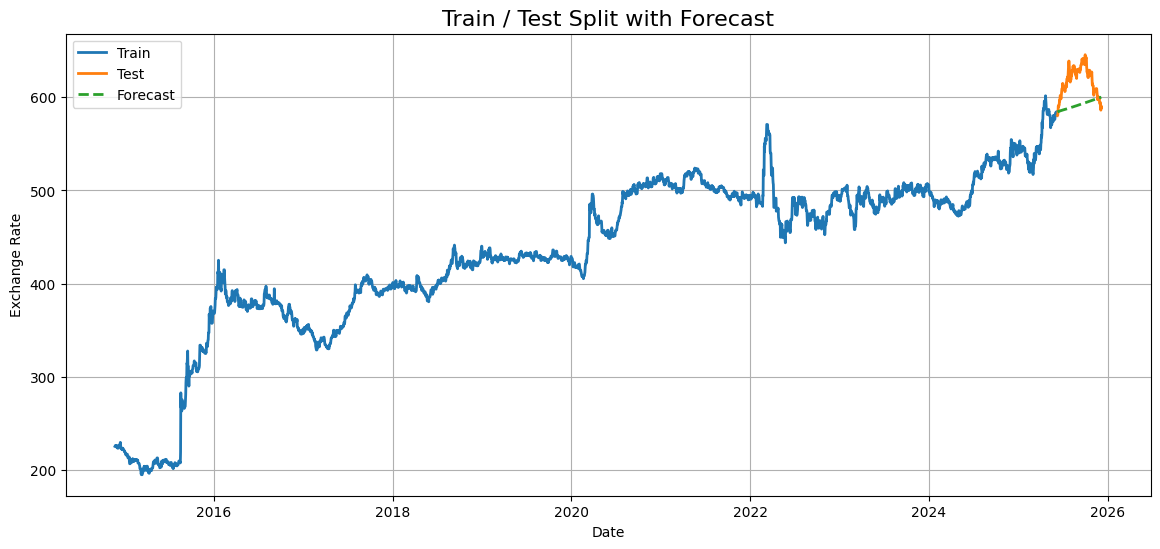

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train", linewidth=2)
plt.plot(test.index, test, label="Test", linewidth=2)
plt.plot(forecast.index, forecast, label="Forecast", linestyle="--", linewidth=2)
plt.title("Train / Test Split with Forecast", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.grid()
plt.show()